<h1>Tripadvisor</h1>

<h1>Overview</h1>

<b>Pre-processing (pipeline):</b> https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/ <br> https://www.kaggle.com/code/nilaychauhan/getting-started-with-nlp-pipelines <br>
    - Langdetect<br>
    - Checking missing values<br>
    - Text Cleaning<br>
    - Lower casing <br>
    - Stop word removal<br>
    - Stemming or lemmatization<br>
    - Tokenization<br>
    
<b>Feature extraction:</b><br>
    - CountVectorizer<br>
    - Bag of Words<br>
    
<b>Train, test and validation split:</b> <br>
    - Train<br>
    - Test <br>
    - Val<br>
    
<b>Models:</b><br>
    - Sentiment analysis<br>
    - Naive bayes<br>
    - Logistic Regression<br>
    
<b>Model Tuning:</b><br>
    - GridSearchCV<br>
    
<b>Models Evaluation</b><br>
    - Classification Report: Sentiment analysis<br>
    - Classification Report: Naive bayes<br>
    - Classification Report: Logistic Regression<br>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt # For figures and visualizations

#Pre-Processing
from langdetect import detect # Used for detecting the language with "langdetect"
from nltk.corpus import stopwords # Collect libary of stopwords


# Importing the data

Importing the "Review" and "Offering" data from TripAdvisor

In [2]:
# specify the path of the CSV file
csv_path = 'review.csv'

# create a DataFrame from the CSV file
df_review = pd.read_csv(csv_path)

df_review.head(5)

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_cities,author.num_helpful_votes,author.num_reviews,author.num_type_reviews,author.id,author.location,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,December 2012,93338,0,"December 17, 2012",147643103,False,5.0,5.0,...,5.0,Papa_Panda,22.0,12.0,29.0,24.0,8C0B42FF3C0FA366A21CFD785302A032,Gold Coast,NaN,NaN
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",December 2012,93338,0,"December 17, 2012",147639004,False,5.0,5.0,...,5.0,Maureen V,2.0,NaN,2.0,NaN,E3C85CA9DBBBC77E0DB534ABE93E4713,"Sydney, New South Wales, Australia",NaN,NaN
2,“Great Stay”,This is a great property in Midtown. We two di...,December 2012,1762573,0,"December 18, 2012",147697954,False,4.0,5.0,...,4.0,vuguru,12.0,17.0,14.0,14.0,FB1032DECE1162CB3556D05F278AAFFD,Houston,NaN,NaN
3,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,August 2012,1762573,0,"December 17, 2012",147625723,False,5.0,5.0,...,5.0,Hotel-Designer,5.0,26.0,5.0,5.0,EC3E275EE7590694889C8C7EE0D13961,"Laguna Beach, CA",NaN,NaN
4,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,December 2012,1762573,0,"December 17, 2012",147612823,False,4.0,5.0,...,5.0,JamesE339,34.0,65.0,104.0,49.0,BA524A238B1171206691A6CC3F28F266,"Saint Louis, Missouri",NaN,NaN


In [3]:
df_review.shape

(878561, 24)

In [4]:
# specify the path of the CSV file
csv_path = 'offering.csv'

# create a DataFrame from the CSV file
df_offering = pd.read_csv(csv_path)

In [5]:
df_offering.shape

(4333, 12)

Below we inner join the two datasets in order to get the column "address.locality" from the offering dataset. We want to use this in order to filter or dataset based on locations.

In [6]:
df_merged = pd.merge(df_review, df_offering, left_on='offering_id', right_on='id', how='inner')

In [7]:
# We are only interested in the columns "text", "rating.overall" and "address.locality"

df_merged = df_merged[['text', 'ratings.overall',"address.locality"]]
#df_merged = df_merged.head(200000)

# EDA

In [8]:
#Make a list of all the cities unless "Washington DC"
distinct_cities = df_merged[df_merged['address.locality'] != 'Washington DC']['address.locality'].drop_duplicates()
distinct_cities = distinct_cities.to_list()
distinct_cities

['New York City',
 'Houston',
 'Los Angeles',
 'Chicago',
 'Philadelphia',
 'San Antonio',
 'San Diego',
 'Phoenix',
 'Dallas',
 'San Jose',
 'Jacksonville',
 'Austin',
 'San Francisco',
 'Indianapolis',
 'Charlotte',
 'Detroit',
 'Columbus',
 'Fort Worth',
 'El Paso',
 'Memphis',
 'Seattle',
 'Boston',
 'Baltimore',
 'Denver']

In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878561 entries, 0 to 878560
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   text              878561 non-null  object 
 1   ratings.overall   878561 non-null  float64
 2   address.locality  878561 non-null  object 
dtypes: float64(1), object(2)
memory usage: 26.8+ MB


In [10]:
df_merged.describe()

,ratings.overall
count,878561.000000
mean,3.936228
std,1.165074
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


<Axes: title={'center': 'Count Reviews by Rating'}>

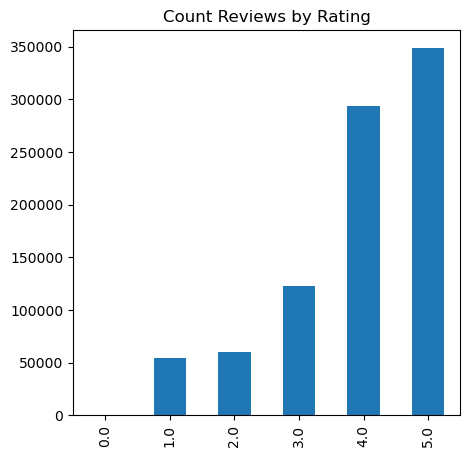

In [11]:
#Counting the ratings and plot
df_merged["ratings.overall"].value_counts().sort_index().plot(kind="bar",title="Count Reviews by Rating", figsize=(5,5))

In [12]:
# calculate the length of each string in the Review column
review_lengths = df_merged['text'].apply(len)

# print the minimum, maximum, and average length of the column Review
print('Minimum length:', review_lengths.min())
print('Maximum length:', review_lengths.max())
print('Average length:', review_lengths.mean())

Minimum length: 4
Maximum length: 22387
Average length: 801.952391467411


# Preprocess

In [13]:
#Choose only reviews from New York City
df_NYC = df_merged[df_merged['address.locality'].isin(distinct_cities)]
df_NYC = df_NYC[['text', 'ratings.overall']]
df_NYC

,text,ratings.overall
0,Stayed in a king suite for 11 nights and yes i...,5.0
1,"On every visit to NYC, the Hotel Beacon is the...",5.0
2,Loved the hotel. Great location - only 2 block...,5.0
3,Our first stay on the upper west side and can'...,5.0
4,"Great room, very big with huge bed! Great loca...",5.0
...,...,...
830219,"Super high quality product, great layout in gu...",5.0
830220,This is an amazing hotel. Very much catering f...,5.0
830221,This is a fantastic hotel that feels brand new...,5.0
830222,Our stay at the downtown Denver Embassy Suites...,4.0


In [14]:
df_NYC = df_NYC[df_NYC['text'].str.len() < 150] #select only rows where length of column "text" is less than 100

df_NYC = df_NYC[['text', 'ratings.overall']]

df_NYC.shape

(28019, 2)

In [15]:
# Define a function to detect language
def detect_lang(text):
    try:
        return detect(text)
    except:
        return None

# Apply the function to create a new column with the language code for each review
df_NYC['language'] = df_NYC['text'].apply(detect_lang)

# Filter the DataFrame to only include rows with English text
df_NYC = df_NYC[df_NYC['language'] == 'en']
df_NYC = df_NYC[["text","ratings.overall"]]
df_NYC

,text,ratings.overall
174,Rooms are fine. Service tries hard but does no...,3.0
193,best place to stay in nyc. Want to go back mis...,5.0
253,"Pleasant. Very pleasant. Clean room, nice bath...",4.0
307,Good family hotel in a good neighborhood. Hote...,3.0
334,We had a beautiful deluxe room with amazing vi...,5.0
...,...,...
830134,Close to the Capitol and to the Museum of Art....,5.0
830187,Overall friendly feel. Employees want to be th...,5.0
830202,"Clean and quiet rooms, WiFi was easy to setup....",5.0
830204,Great new embassy suites. Service staff excell...,5.0


In [16]:
# lowercase the text
df_NYC['text'] = df_NYC['text'].str.lower()

In [17]:
#library that contains punctuation https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
import string 
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df_NYC['clean_text']= df_NYC['text'].apply(lambda x:remove_punctuation(x))

df_NYC["text"] = df_NYC["clean_text"]
df_NYC = df_NYC[["text","ratings.overall"]]
df_NYC

,text,ratings.overall
174,rooms are fine service tries hard but does not...,3.0
193,best place to stay in nyc want to go back miss...,5.0
253,pleasant very pleasant clean room nice bathroo...,4.0
307,good family hotel in a good neighborhood hotel...,3.0
334,we had a beautiful deluxe room with amazing vi...,5.0
...,...,...
830134,close to the capitol and to the museum of art ...,5.0
830187,overall friendly feel employees want to be the...,5.0
830202,clean and quiet rooms wifi was easy to setup b...,5.0
830204,great new embassy suites service staff excelle...,5.0


In [18]:
#Save a CSV file of the text before pre-processing
df_NYC.to_csv("data_preprocessed.csv", index=False)

In [19]:
df_NYC.head()

,text,ratings.overall
174,rooms are fine service tries hard but does not...,3.0
193,best place to stay in nyc want to go back miss...,5.0
253,pleasant very pleasant clean room nice bathroo...,4.0
307,good family hotel in a good neighborhood hotel...,3.0
334,we had a beautiful deluxe room with amazing vi...,5.0


# Save tokenized dataset

In [20]:
#Using the Spacy Libary for word tokenization - we could also look at sentence tokenization
#https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
# Create an empty list to store the tokenized text
tokenized_text = []
# Iterate over each row of the "clean_text" column
for row in df_NYC["text"]:
    # Apply Spacy's English tokenizer to the text
    my_doc = nlp(row)

    # Create list of word tokens for the current row
    token_list = [token.text for token in my_doc]

    # Add the list of tokens for the current row to the tokenized_text list
    tokenized_text.append(token_list)

# Add the tokenized_text list as a new column to the DataFrame
df_NYC["tokenized_text"] = tokenized_text

In [21]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df_NYC['tokenized_text']= df_NYC['tokenized_text'].apply(lambda x:remove_stopwords(x))

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kristofferkristensen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df_NYC['msg_lemmatized']=df_NYC['tokenized_text'].apply(lambda x:lemmatizer(x))

In [24]:
df_NYC["text"] = df_NYC["msg_lemmatized"]
df_NYC = df_NYC[["text","ratings.overall"]]

In [25]:
df_NYC

,text,ratings.overall
174,"[room, fine, service, try, hard, always, succe...",3.0
193,"[best, place, stay, nyc, want, go, back, miss,...",5.0
253,"[pleasant, pleasant, clean, room, nice, bathro...",4.0
307,"[good, family, hotel, good, neighborhood, hote...",3.0
334,"[beautiful, deluxe, room, amazing, view, , sp...",5.0
...,...,...
830134,"[close, capitol, museum, art, downtown, walkin...",5.0
830187,"[overall, friendly, feel, employee, want, best...",5.0
830202,"[clean, quiet, room, wifi, easy, setup, breakf...",5.0
830204,"[great, new, embassy, suite, service, staff, e...",5.0


In [26]:
#Save a CSV file of the text with tokenization
df_NYC.to_csv("data_tokenized.csv", index=False)

# Balanced dataset

In [27]:
# Get the minimum count of the value_counts for each rating
min_count = df_NYC["ratings.overall"].value_counts().min()

# Create a new DataFrame with an equal number of rows for each rating
new_df = pd.concat([df_NYC[df_NYC["ratings.overall"] == rating].sample(n=min_count) for rating in range(1, 6)])

# Print the value counts for each rating in the new DataFrame
new_df.to_csv("data_preprocessed_balanced.csv", index=False)

In [28]:
new_df.shape

(3420, 2)

In [29]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True